# Project: Wrangling and Analyze Data

### Dataset: WeRateDogs Twitter Data

### About Dataset:

 WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

### Data Gathering
In this section of the **Data Wrangling** process, I will gather **all** three pieces of data for this project and load them in this notebook.

In [1]:
#Import all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. In the cell below I will directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) that was made available from the **Udacity** classroom

In [2]:
archive_data = pd.read_csv('twitter-archive-enhanced.csv')
archive_data.shape

(2356, 17)

2. In the cell below, I will use the Requests library to download the tweet image prediction (image_predictions.tsv) from the **Udacity** server

In [3]:
import requests
import os

In [4]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)



In [5]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
image_data= pd.read_csv('image-predictions.tsv', sep='\t')
image_data.shape

(2075, 12)

3. In the cell below I will download a JSON text and read into pandas DataFrame
(Note to Reviewer, Twitter would not grant elevated access at the time of building this project, so the method of using Tweepy library to query Twitter API could not be used.
The JSON file provided on **Udacity** server was downloaded and used instead)

In [8]:
import json


In [9]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json', 'r') as file:
    lines= file.readlines()
    
data= []
for line in lines:
    data.append(json.loads(line))
    
data= pd.DataFrame(data)

In [10]:
tweet_data_extra= data[['id', 'retweet_count', 'favorite_count']].copy()
tweet_data_extra.rename(columns={'id':'tweet_id'}, inplace= True)
tweet_data_extra.shape

(2354, 3)

**Data gathering** complete and all required data have been loaded into a pandas DataFrame:
- `archive_data`: contains data about the archived WeRateDogs tweets.
- `image_data`: contains the prediction results of a machine learning algorithm trained on a sample of the images from the tweets in the WeRateDogs archive.
- `tweet_data_extra`: contains additional data about the WeRateDogs tweets gathered from Twitter.

### Assessing Data
In this section, I will perform visual and programmatic assessments of the data for quality and tidiness issues.

### Visual Assessment

In [11]:
#Perform visual assessment of each dataset

archive_data.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ralf. He's a miniature Buick DiCaprio. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,None,None,None,None
246,845677943972139009,NaN,NaN,2017-03-25 16:45:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. Please only send in dogs. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845677943...,12,10,None,None,None,None,None
38,884925521741709313,NaN,NaN,2017-07-12 00:01:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He found a hat. Nervous about wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,None,None,None,None
1739,679511351870550016,NaN,NaN,2015-12-23 03:58:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to William. He makes fun of others b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679511351...,7,10,William,None,None,None,None
1939,673887867907739649,NaN,NaN,2015-12-07 15:32:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a great time sleeping and y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673887867...,10,10,None,None,None,None,None
1950,673688752737402881,NaN,NaN,2015-12-07 02:21:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He doesn't know how to shoe. 9/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673688752...,9,10,Larry,None,None,None,None
928,754747087846248448,NaN,NaN,2016-07-17 18:38:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's pursuing a more 2D lifesty...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754747087...,12,10,Keith,None,None,None,None
684,788178268662984705,NaN,NaN,2016-10-18 00:41:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's got doggles. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788178268...,13,10,None,None,None,None,None
576,800859414831898624,8.008580e+17,291859009.0,2016-11-22 00:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@SkyWilliams doggo simply protecting you from ...,NaN,NaN,NaN,NaN,11,10,None,doggo,None,None,None


In [12]:
#Perform visual assessment of each dataset

image_data.sample(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1664,812466873996607488,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,bath_towel,0.099804,False,pillow,0.092318,False,Great_Dane,0.078205,True
783,690015576308211712,https://pbs.twimg.com/media/CZNtgWhWkAAbq3W.jpg,2,malamute,0.949609,True,Siberian_husky,0.033084,True,Eskimo_dog,0.016663,True
1795,831315979191906304,https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg,4,briard,0.982755,True,soft-coated_wheaten_terrier,0.009084,True,Bouvier_des_Flandres,0.004693,True
143,668620235289837568,https://pbs.twimg.com/media/CUdqjvAWUAANfoU.jpg,1,crash_helmet,0.757942,False,toaster,0.037497,False,mouse,0.027271,False
913,700864154249383937,https://pbs.twimg.com/media/Cbn4OqKWwAADGWt.jpg,1,kuvasz,0.805857,True,Great_Pyrenees,0.187272,True,Samoyed,0.003491,True
1755,824796380199809024,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
286,671151324042559489,https://pbs.twimg.com/media/CVBokRSWsAADuXx.jpg,1,Rottweiler,0.781201,True,black-and-tan_coonhound,0.061206,True,kelpie,0.048856,True
1751,824297048279236611,https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg,2,teddy,0.588230,False,jigsaw_puzzle,0.028910,False,doormat,0.022251,False
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [13]:
#Perform visual assessment of each dataset

tweet_data_extra.sample(100)

,tweet_id,retweet_count,favorite_count
2053,671362598324076544,325,1193
1360,703041949650034688,14198,28996
1863,675354435921575936,18963,35178
1492,692568918515392513,1737,4739
415,822610361945911296,3423,16327
2020,672068090318987265,564,1389
1641,683857920510050305,1262,4163
1055,742150209887731712,1783,5661
1451,695629776980148225,2377,5020
1363,702684942141153280,1215,3516


### Programmatic Assessment

In [14]:
#Display structure and datatypes of archive_data DataFrame

archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
#Check for duplicate 'tweet_id' entries

archive_data['tweet_id'].duplicated().sum()

0

In [16]:
#Check for duplicate rows

archive_data.duplicated().sum()

0

In [17]:
#Display structure of image_data DataFrame

image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
#Check for duplicate 'tweet_id' entries

image_data['tweet_id'].duplicated().sum()

0

In [19]:
#Check for duplictate rows

image_data.duplicated().sum()

0

In [20]:
#Display structure and datatypes of tweet_data_extra DataFrame

tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
#Check for duplicate 'tweet_id' entries

tweet_data_extra['tweet_id'].duplicated().sum()

0

In [22]:
#Check for duplicate rows

tweet_data_extra.duplicated().sum()

0

### Issues Detected:
The observations from the visual and programmatic assessments carried out and the subsequent issues detected are listed below:

### Quality issues
1. In `archive_data`, **name** column contains invalid data values that are not names

2. In `archive_data`, **name** column as missing data as 'None'

3. In `archive_data`, **source** column contains HTML residues

4. In `archive_data`, **tweet_id** and **timestamp** columns are in wrong datatypes

5. `archive_data` dataset contains retweets, which for the purpose of this analysis constitute a data quality issue

6. In `image_data`, words adjoined together with underscores in columns **p1**, **p2**, **p3**

7. In `image_data`, **tweet_id** column is in wrong datatype

8. In `tweet_data_extra`, **tweet_id** column is in wrong datatype

### Tidiness issues
9. In `archive_data`, one variable i.e. the type of dog(or dog stage) is represent across four columns i.e. **doggo**, **floofer**, **pupper** and **puppo**

10. `tweet_data_extra`, `archive_data` and `image_data` should be merged into one dataset

### Cleaning Data
In this section, all issues detected while assessing will be cleaned and the subsequently cleaned DataFrames will be merged into one.

In [23]:
# Make copies of original pieces of data

archive_data_clean = archive_data.copy()
image_data_clean = image_data.copy()
tweet_data_extra_clean = tweet_data_extra.copy()

### Issue #1:
In `archive_data`, **name** column contains invalid data values that are not names

#### Define:
Remove all invalid values for **name**

#### Code

In [24]:
archive_data_clean['name']= archive_data_clean['name'].apply(lambda x: x if x[0]== x[0].upper() and x!= 'None' else None)

#### Test

In [25]:
#Display entries in 'name' column

archive_data_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          None
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326        None
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

### Issue #2:
In `archive_data`, **name** column as missing data as 'None'

#### Define:
Replace all 'None' entries with NaN 

#### Code

In [26]:
archive_data_clean['name'] = archive_data_clean['name'].replace('None', np.nan)

#### Test

In [27]:
#Sum up entries in 'name' column whose values are 'None'

archive_data_clean['name'].loc[archive_data_clean['name'] == 'None'].sum()

False

### Issue #3:
In `archive_data`, **source** column contains HTML residues

#### Define:
Remove all HTML residues from **source** column

#### Code

In [28]:
archive_data_clean['source'] = archive_data_clean['source'].map(lambda x: x.lstrip('<a href=').rstrip('</a>'))

#### Test

In [29]:
#Display entries in 'source' colu 

archive_data_clean['source'].head()

0    "http://twitter.com/download/iphone" rel="nofo...
1    "http://twitter.com/download/iphone" rel="nofo...
2    "http://twitter.com/download/iphone" rel="nofo...
3    "http://twitter.com/download/iphone" rel="nofo...
4    "http://twitter.com/download/iphone" rel="nofo...
Name: source, dtype: object

### Issue #4:
In `archive_data`, **tweet_id** and **timestamp** columns are in wrong datatypes

#### Define:
Convert **tweet_id** and **timestamp** to correct/accurate datatypes

#### Code

In [30]:
archive_data_clean['tweet_id'] = archive_data_clean['tweet_id'].astype(str)
archive_data_clean['timestamp'] = pd.to_datetime(archive_data_clean['timestamp'])

#### Test

In [31]:
assert archive_data_clean['tweet_id'].dtype == 'O', "'tweet_id' is not of type 'object'"

In [32]:
assert archive_data_clean['timestamp'].dtype == '<M8[ns]', "'timestamp' is not of type 'datetime'"

### Issue #5:
`archive_data` dataset contains retweets, which for the purpose of this analysis constitute a data quality issue

#### Define:
Remove retweeted entries leaving only original tweets

#### Code

In [33]:
archive_data_clean= archive_data_clean[archive_data_clean['in_reply_to_status_id'].isnull()]
archive_data_clean= archive_data_clean[archive_data_clean['retweeted_status_id'].isnull()]

In [34]:
archive_data_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis= 1, inplace= True)

#### Test

In [35]:
archive_data_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [36]:
archive_data_clean.shape

(2097, 12)

### Issue #6:
In `image_data`, words adjoined together with underscores in columns **p1**, **p2**, **p3**

#### Define:
Remove the underscore character from entries in the **p1**, **p2**, **p3** columns

#### Code

In [37]:
image_data_clean['p1'] = image_data_clean['p1'].str.replace('_', ' ')

In [38]:
image_data_clean['p2'] = image_data_clean['p2'].str.replace('_', ' ')

In [39]:
image_data_clean['p3'] = image_data_clean['p3'].str.replace('_', ' ')

In [40]:
image_data_clean['p1'] = image_data_clean['p1'].str.lower()

In [41]:
image_data_clean['p2'] = image_data_clean['p2'].str.lower()

In [42]:
image_data_clean['p3'] = image_data_clean['p3'].str.lower()

#### Test

In [43]:
image_data_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
346,672466075045466113,https://pbs.twimg.com/media/CVUUU_EWoAAxABV.jpg,1,cocker spaniel,0.150424,True,toy poodle,0.088605,True,welsh springer spaniel,0.072014,True
1190,739844404073074688,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1,toy poodle,0.342397,True,table lamp,0.104451,False,miniature poodle,0.079871,True
1640,807059379405148160,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat belt,0.474292,False,golden retriever,0.171393,True,labrador retriever,0.110592,True
1472,779834332596887552,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden retriever,0.993830,True,cocker spaniel,0.003143,True,great pyrenees,0.000917,True
1241,747103485104099331,https://pbs.twimg.com/media/Cl4-pevXEAAb8VW.jpg,1,labrador retriever,0.991954,True,golden retriever,0.002228,True,doormat,0.001404,False


### Issue #7:
In `image_data`, **tweet_id** column is in wrong datatype

#### Define:
Convert **tweet_id** to correct datatype

#### Code

In [44]:
image_data_clean['tweet_id']= image_data_clean['tweet_id'].astype(str)

#### Test

In [45]:
assert image_data_clean['tweet_id'].dtype == 'O', "'tweet_id' is not of type 'object'"

### Issue #8:
In `tweet_data_extra`, **tweet_id** column is in wrong datatype

#### Define:
Convert **tweet_id** to correct datatype

#### Code

In [46]:
tweet_data_extra_clean['tweet_id']= tweet_data_extra_clean['tweet_id'].astype(str)

#### Test

In [47]:
assert tweet_data_extra_clean['tweet_id'].dtype == 'O', "'tweet_id' is not of type 'object'"

### Issue #9:
In `archive_data`, one variable i.e. the type of dog(or dog stage) is represent across four columns i.e. **doggo**, **floofer**, **pupper** and **puppo**

#### Define:
Combine the **doggo**, **floofer**, **pupper**, and **puppo** columns into a single column before dropping them. All 'None' entries will be converted to NaNs.

#### Code

In [48]:
def dog_stage(row):
    # Defining a list to store the data
    stg_lst = []
    # Setting the conditional
    if row['doggo'] == 'doggo':
        # Adding the entry to the list if it satisfies the condition
        stg_lst.append('doggo')
    if row['floofer'] == 'floofer':
        stg_lst.append('floofer')
    if row['pupper'] == 'pupper':
        stg_lst.append('pupper')
    if row['puppo'] == 'puppo':
        stg_lst.append('puppo')
    if len(stg_lst) < 1: 
        row['stage'] = np.NaN
    else: 
        row['stage'] = ' and '.join(stg_lst)
    return row

In [49]:
# Applying the "dog-stage" function to each record
archive_data_clean= archive_data_clean.apply(dog_stage, axis=1)

In [50]:
# Discarding unwanted entries
archive_data_clean= archive_data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [51]:
archive_data_clean.head(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,"""http://twitter.com/download/iphone"" rel=""nofo...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12,"""http://twitter.com/download/iphone"" rel=""nofo...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,"""http://twitter.com/download/iphone"" rel=""nofo...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Issue #10:
`tweet_data_extra`, `archive_data` and `image_data` should be merged into one dataset

#### Define
Merge the three DataFrames into one master DataFrame

#### Code

In [52]:
archive_data_master= pd.merge(archive_data_clean, tweet_data_extra_clean, on='tweet_id', how= 'left')
archive_data_master= pd.merge(archive_data_master, image_data_clean, on='tweet_id', how= 'left')

#### Test

In [53]:
archive_data_master.shape

(2097, 22)

In [54]:
archive_data_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,...,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,...,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


### Storing Data
Here, the master dataset is saved to a CSV file named "twitter_archive_master.csv".

In [55]:
archive_data_master.to_csv('twitter_archive_master.csv',index=False)

### Analyzing and Visualizing Data
In this section, the master dataset is analysed for more insights.

1. Retweets and Likes Metrics on the WeRateDogs Platform

In [56]:
# Getting the highest retweets

print('The highest number of retweets recorded is- ', archive_data_master['retweet_count'].max())

The highest number of retweets recorded is-  79515


In [57]:
#Getting the lowest retweets

print('The lowest number of retweets recorded is- ', archive_data_master['retweet_count'].min())

The lowest number of retweets recorded is-  16


In [58]:
#Getting the highest likes

print('The highest number of likes recorded is- ', archive_data_master['favorite_count'].max())

The highest number of likes recorded is-  132810


In [59]:
#Getting the lowest likes

print('The lowest number of likes recorded is- ', archive_data_master['favorite_count'].min())

The lowest number of likes recorded is-  81


The WeRateDogs platform has generated retweet counts with the highest being 79,515 and the lowest being 16. While also generating likes from as high as 132,810 to as low as 81, making it quite a popular platform.

2. Breeds Diversity and Most Common Breeds on the WeRateDogs Platform

In [60]:
# Generating a copy of the master DataFrame for analysis of top dog breeds

dog_breeds= archive_data_master.copy()

In [61]:
# Fetching the count of unique breeds

print('The number of unique Dog Breeds is- ', dog_breeds['p1'].nunique())

The number of unique Dog Breeds is-  373


In [62]:
# Calculating the frequency of occurence of dog breeds

frequency= dog_breeds['p1'].value_counts().to_dict()
freq= pd.DataFrame(list(frequency.items()), columns=['dog_breed', 'frequency'])

# Filtering for frequencies > 50

freq.drop(freq[freq.frequency < 50].index, inplace=True)
freq['dog_breed']= freq['dog_breed'].str.title()

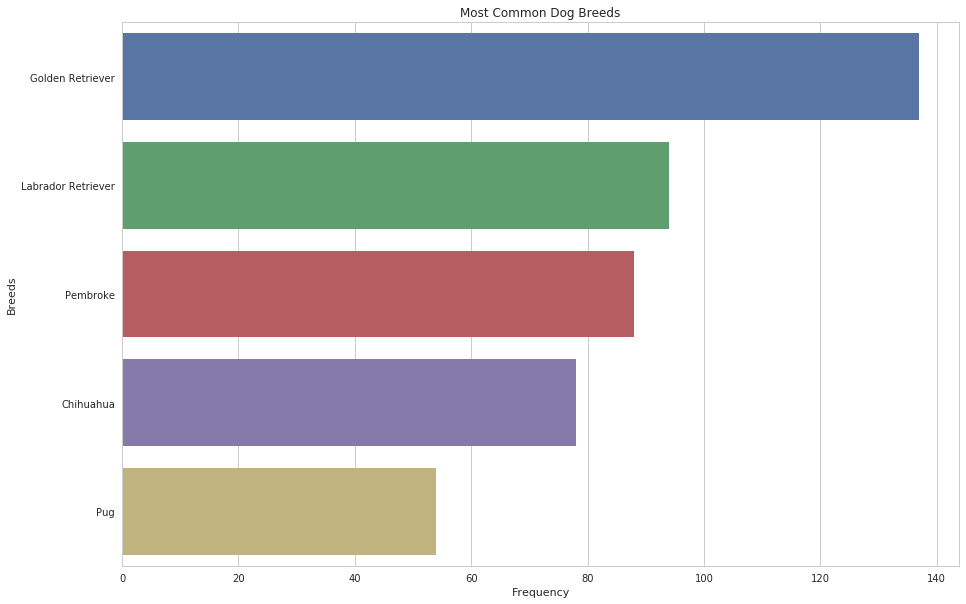

In [63]:
sns.set(rc={'figure.figsize':(15,10)})

# Setting up plot layout and design

sns.set_style("whitegrid")
g= sns.barplot(y= "dog_breed", x= "frequency", data= freq)
g.set_ylabel('Breeds')

plt.title('Most Common Dog Breeds')
plt.xlabel('Frequency')

fig =g.get_figure()
fig.savefig('most_common_breeds.png')

There are 373 different breeds of dogs that have appeared on the WeRateDogs platform, with the top 5 most common breeds being Golden Retrievers, Labrador Retrievers, Pembrokes, Chihuahuas and Pugs.

3. Most Common Dog Stages on the WeRateDogs Platform

In [64]:
# Generating a copy of the master DataFrame for analysis dog stages

dog_stage= archive_data_master.copy()

In [65]:
# Fetching the count of unique stages

print('The number of unique Dog Stages is- ', dog_stage['stage'].nunique())

The number of unique Dog Stages is-  7


In [66]:
# Calculating the frequency of various Dog stages

stage_frequency= dog_stage['stage'].value_counts().to_dict()
stage_freq= pd.DataFrame(list(stage_frequency.items()), columns=['dog_stage', 'frequency'])
stage_freq['dog_stage']= stage_freq['dog_stage'].str.title()
stage_freq

,dog_stage,frequency
0,Pupper,221
1,Doggo,72
2,Puppo,23
3,Doggo And Pupper,9
4,Floofer,9
5,Doggo And Floofer,1
6,Doggo And Puppo,1


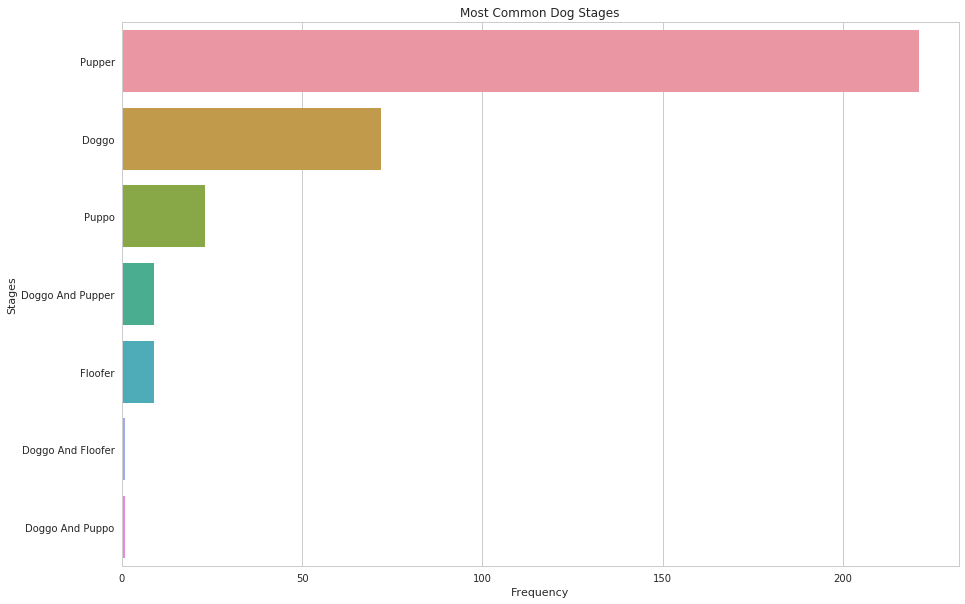

In [67]:
# Setting up plot layout and design

sns.set_style("whitegrid")
g= sns.barplot(y= "dog_stage", x="frequency", data=stage_freq)
g.set_ylabel('Stages')

plt.title('Most Common Dog Stages')
plt.xlabel('Frequency')

fig =g.get_figure()
fig.savefig('most_common_stages.png')

The most common dog stage is the Pupper stage meaning most dogs appearing on the WeRateDogs platform are puppies.

4. WeRateDogs Rating System

In [68]:
#Creating a rating column from the rating numerator and denominator

archive_data_master['rating']= archive_data_master['rating_numerator'].astype(str) + "/" + \
                                  archive_data_master['rating_denominator'].astype(str)
archive_data_master['rating'].value_counts()

12/10      486
10/10      436
11/10      413
13/10      287
9/10       152
8/10        98
7/10        51
14/10       38
5/10        34
6/10        32
3/10        19
4/10        15
2/10         9
1/10         4
45/50        1
204/170      1
420/10       1
44/40        1
50/50        1
80/80        1
60/50        1
26/10        1
9/11         1
7/11         1
88/80        1
99/90        1
1776/10      1
165/150      1
1/2          1
4/20         1
84/70        1
24/7         1
0/10         1
121/110      1
144/120      1
75/10        1
27/10        1
Name: rating, dtype: int64

The highest rating on the platform according to the WeRateDogs rating system 1776/10, although not much can be made of this as there's clear evidence of humorous ratings that the platform is noted for (They are good dogs Brent), and outliers.

In [69]:
#Creating a sample dataset for visualization

rating_frequency = archive_data_master['rating'].value_counts().to_dict()
ratings = pd.DataFrame(list(rating_frequency.items()), columns=['rating', 'frequency'])

#Dropping samples only occuring once to avoid presence of outliers in plot

ratings.drop(ratings[ratings.frequency < 2].index, inplace=True)
ratings.head()

,rating,frequency
0,12/10,486
1,10/10,436
2,11/10,413
3,13/10,287
4,9/10,152


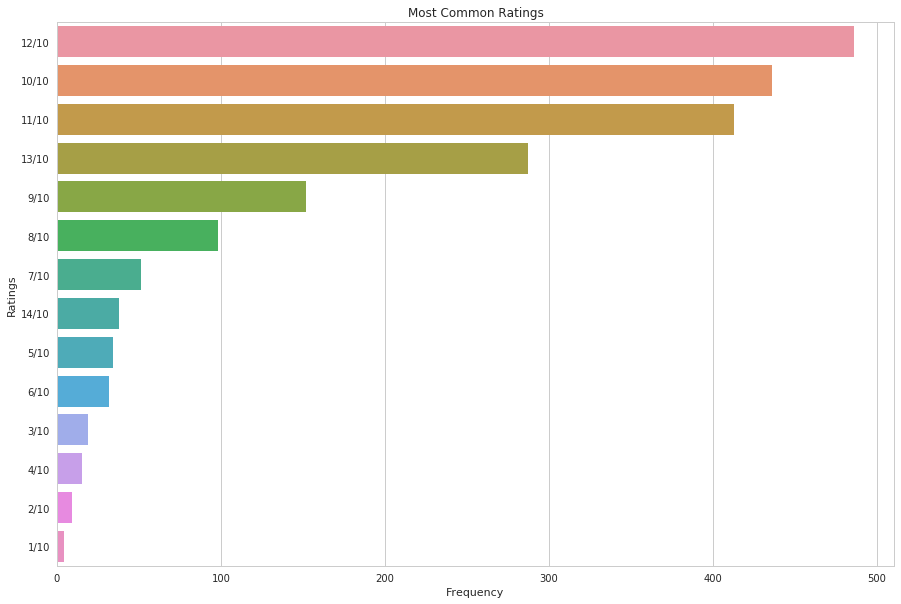

In [70]:
# Setting up layout and design

sns.set_style("whitegrid")
g = sns.barplot(y="rating", x="frequency", data= ratings)
g.set_ylabel('Ratings')

# Setting the appropriate headers
plt.title('Most Common Ratings')
plt.xlabel('Frequency')

# Exporting the figure
fig =g.get_figure()
fig.savefig('ratings.png')

The most common rating on the platform is 12/10. Closely followed by 10/10 and 11/10. The ratings clearly show that WeRateDogs really love their dogs, afterall, They're good dogs Brent.